# 3D based measure extraction

This notebook provides an example how the measures as described in [1] can be extracted from a polygon mesh (.vtk) with the provided software in this folder. 

In [1]:
from helpers import load_data, stats
import matplotlib.pyplot as plt

coral_name = '15Oki03'
polygon_mesh = load_data.readVTK(coral_name)

## Polygon mesh-based measures

From the polygon mesh the surface-area-to-volume ratio ($S/V$-ratio) and sphericity ($\phi$) are derived as single variables. In addition, surface curvature measures are obtained per vertex.

In [2]:
from polygon_mesh_based import surface_volume, curvature

### $S/V$-ratio and $\phi$

In [3]:
surf_vol_measures = surface_volume.getSurfaceVolumeMeasures(polygon_mesh)

print(f"S/V-ratio:   {surf_vol_measures['SV_ratio']}")
print(f"sphericity:  {surf_vol_measures['sphericity']}")

S/V-ratio:   6.908932889384034
sphericity:  0.2132708411579287


### Curvature

In [4]:
# obtain curvature values
curvature_measures = curvature.getCurvature(polygon_mesh)

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000


In [8]:
# print curvature arrays
print(f"K:  {curvature_measures['Gauss']}")
print(f"H:  {curvature_measures['Mean']}")
print(f"k1: {curvature_measures['Maximum']}")
print(f"k2: {curvature_measures['Minimum']}")

K:  [ 21.9078511   17.03902535  -8.15663642 ... 377.07331545  59.23585971
 -67.85954884]
H:  [  5.11518797   4.40376912  -0.44229446 ...  23.55604207 -10.23248839
  -2.07672672]
k1: [ 7.17850978  5.93809539  2.44773337 ... 36.89072626 -3.48949507
  6.41870398]
k2: [  3.05186616   2.86944285  -3.33232228 ...  10.22135788 -16.97548172
 -10.57215741]


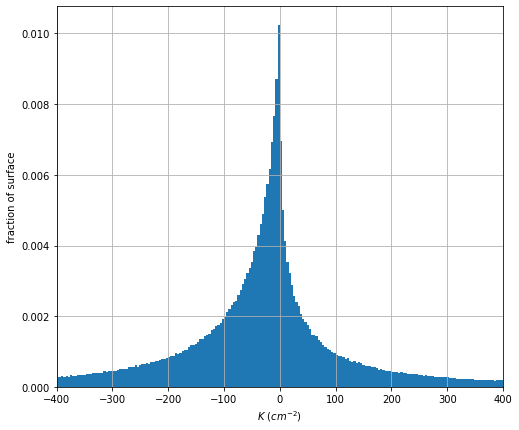

In [14]:
# get distribution characteristics (example Gaussian curvature)
example_data = curvature_measures['Gauss']

# plot distribution
plt.figure(figsize=(8,7))
plt.grid()
plt.hist(example_data, bins = 200, density=True, range = (-400,400),weights=curvature_measures['areas'])
plt.xlim((-400,400))
plt.xlabel(r'$K$ ($cm^{-2}$)')
plt.ylabel('fraction of surface')
plt.show()

In [7]:
# distribution characteristics
distr = stats.getDistributionCharactertics(example_data, weighted=True, weights = curvature_measures['areas'])
print(distr)
print(f"K_mean: {distr['mean']}")
print(f"K_var:  {distr['variance']}")
print(f"K_skew: {distr['skewness']}")
print(f"K_kurt: {distr['kurtosis']}")

{'mean': -16.82538485970925, 'variance': 67776.05691868407, 'skewness': 1.2184566215432033, 'kurtosis': 9.266855618628416}
K_mean: -16.82538485970925
K_var:  67776.05691868407
K_skew: 1.2184566215432033
K_kurt: 9.266855618628416


## Medial axis skeleton-derived measures 

### Skeletonization
First the polygon mesh is transformed into a medial axis skeleton. First the mesh is smoothened